In [43]:
import pandas as pd
import numpy as np

In [44]:
df_csv_bio = pd.read_csv('data/sequences_bio_clean_alignment_filtro.csv', sep=',')

### Conteo cruzado entre especie y tipo de péptido señal.


In [45]:
tabla = pd.crosstab(df_csv_bio["Species Family"], df_csv_bio["Peptide_Family"])
tabla.to_csv("data/tabla_cruzada.csv")
print(tabla)

Peptide_Family  Amolopin  Brevinin  Dermaseptin  Esculentin  Gaegurin  \
Species Family                                                          
AGALYCHNIS             0         0            4           0         0   
AMOLOPS               43        61            0          17         0   
AQUARANA               0         0            0           0         0   
ATYPICAL               0         0            1           0         0   
BABINA                 0         1            0           0         0   
CALLIMEDUSA            0         0            0           0         0   
GLANDIRANA             0         6            0           1         3   
HOST                   0         0            0           0         0   
HYLARANA               0        20            0           5        34   
INDOSYLVIRANA          0         3            0           0         0   
LITHOBATES             0         5            0           9         0   
NIDIRANA               0         2            0    

### Logo con colores por propiedades químicas.


In [46]:

import logomaker

In [47]:
# Definir colores por propiedades químicas
color_scheme = {
    'A':'#8DD3C7',  # alipáticos
    'C':'#FFFFB3',  # azufrados
    'D':'#BEBADA',  # ácidos
    'E':'#FB8072',
    'F':'#80B1D3',  # aromáticos
    'G':'#FDB462',  # especiales
    'H':'#B3DE69',  # básicos
    'I':'#FCCDE5',
    'K':'#D9D9D9',
    'L':'#BC80BD',
    'M':'#CCEBC5',
    'N':'#FFED6F',
    'P':'#66C2A5',
    'Q':'#FC8D62',
    'R':'#8DD3C7',
    'S':'#B3B3B3',
    'T':'#FFFF99',
    'V':'#1F78B4',
    'W':'#E31A1C',
    'Y':'#33A02C',
    '-':'#FFFFFF'  # gap en blanco
}

In [48]:
def graficar_logo(seqs_array, titulo='todos', carpeta='todos'):
    seqs_array = np.array(seqs_array)
    aa_list = list("ACDEFGHIKLMNPQRSTVWY-")  # agregar guion si hay gaps

    # Crear un dataframe de conteo
    counts = []
    for i in range(seqs_array.shape[1]):
        col = seqs_array[:, i]
        freq = pd.Series(col).value_counts(normalize=True)
        counts.append(freq)

    
    counts_df = pd.DataFrame(counts).fillna(0)    
    for aa in aa_list:
        if aa not in counts_df.columns:
            counts_df[aa] = 0
            
    counts_df = counts_df[aa_list]  # ordenar columnas



    # Crear logo con colores
    logo = logomaker.Logo(counts_df, color_scheme=color_scheme)
    logo.style_spines(visible=False)
    logo.style_spines(spines=['left', 'bottom'], visible=True)
    logo.style_xticks(rotation=90, fmt='%d', anchor=0)
    logo.ax.set_title(titulo, fontsize=10)  # ax es el eje del logo
    logo.fig.savefig(f"fig/logo/{carpeta}/{titulo}_sequence_logo_colores_propiedades.png", dpi=300)
    return logo

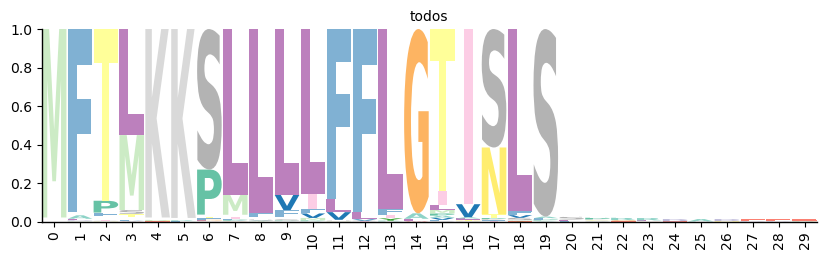

In [49]:
seqs_array = df_csv_bio['alignment'].apply(lambda x: list(x)).to_list()
graficar_logo(seqs_array, 'todos')


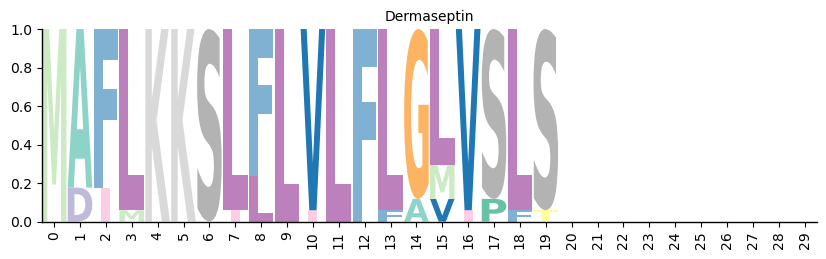

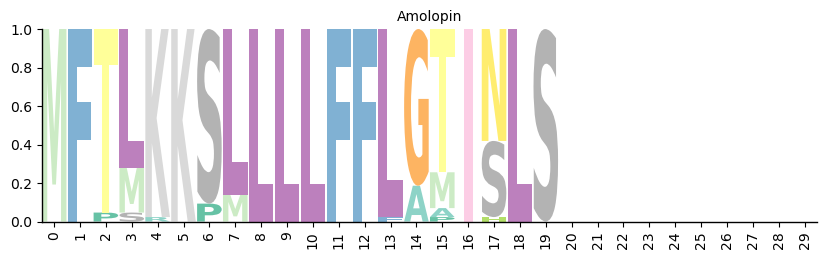

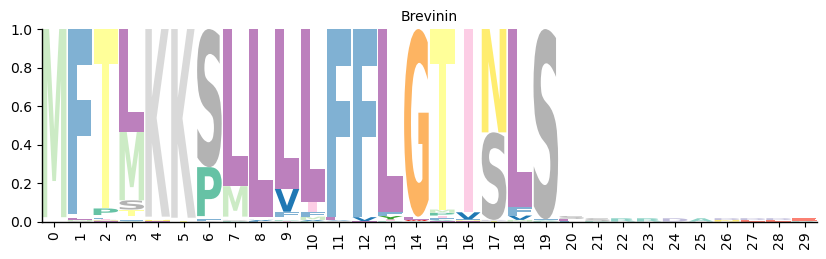

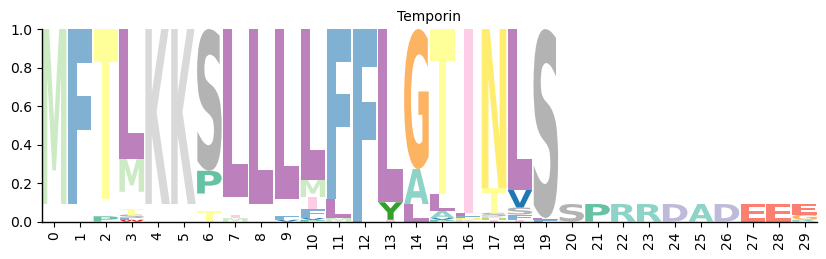

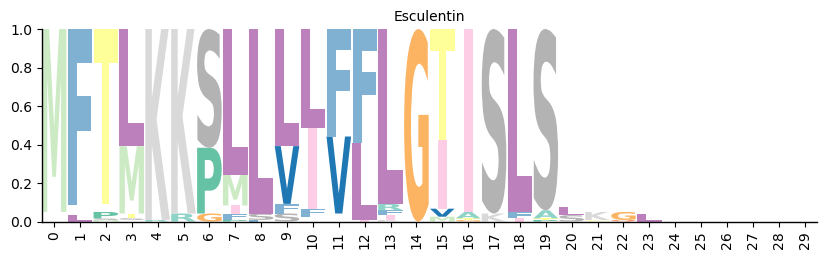

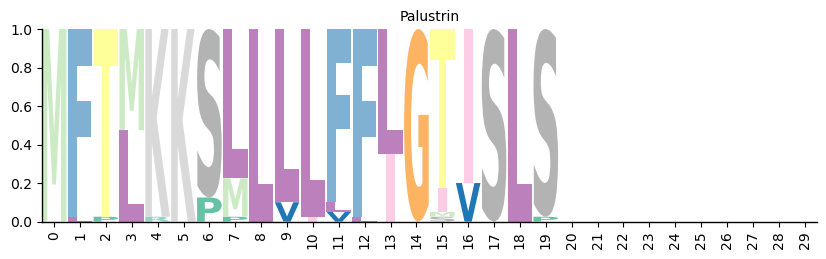

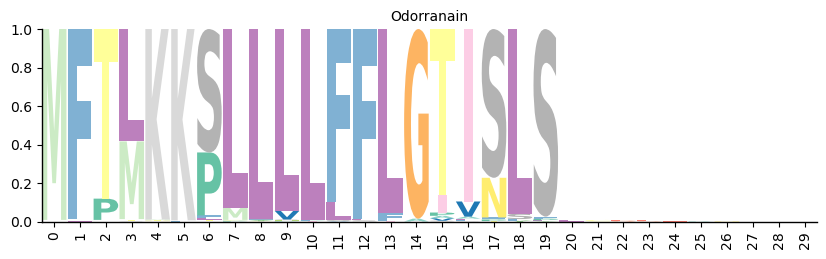

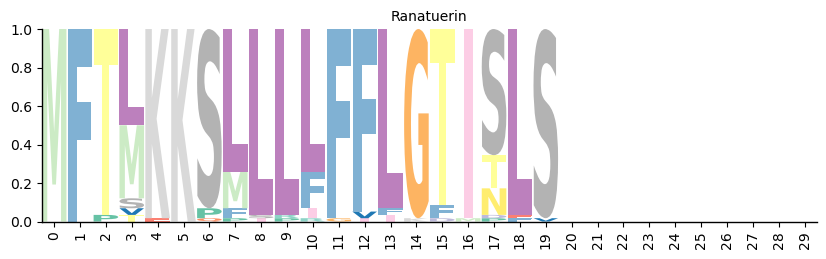

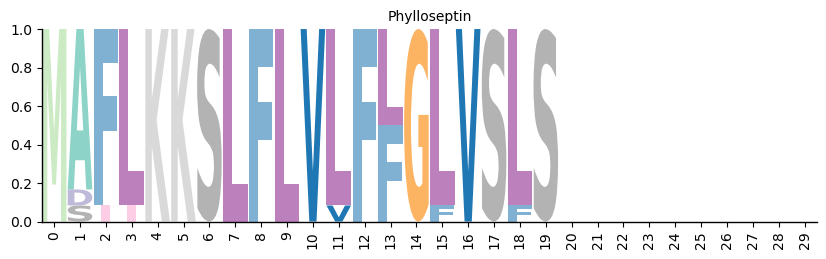

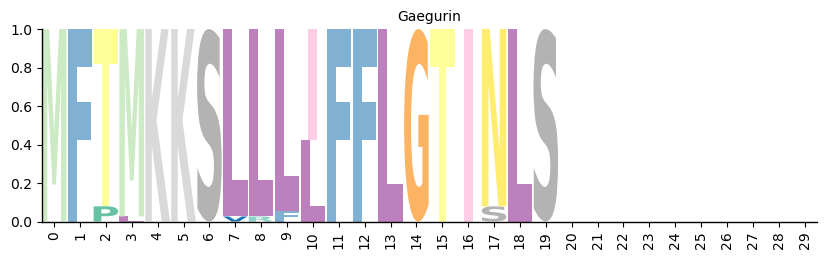

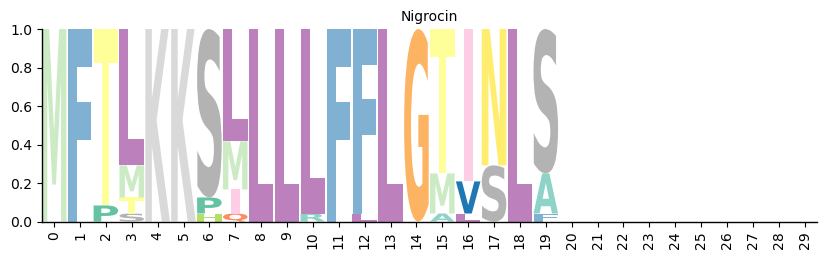

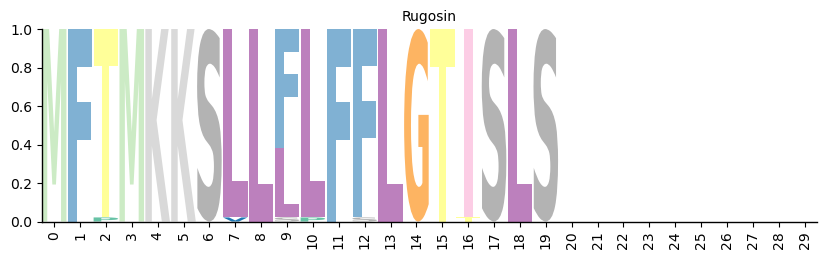

In [50]:
for peptide_family in df_csv_bio['Peptide_Family'].unique():
    seqs_array = df_csv_bio[df_csv_bio['Peptide_Family'] == peptide_family]['alignment'].apply(lambda x: list(x)).to_list()
    graficar_logo(seqs_array, peptide_family, 'peptido')

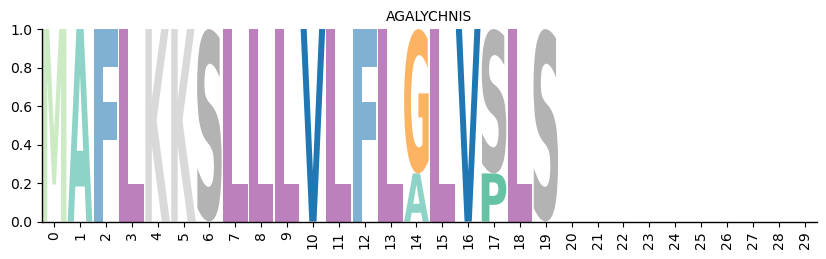

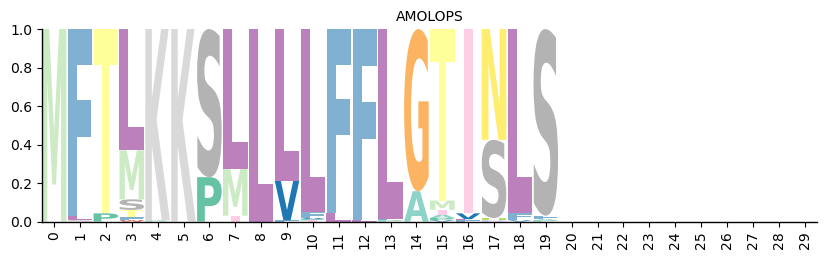

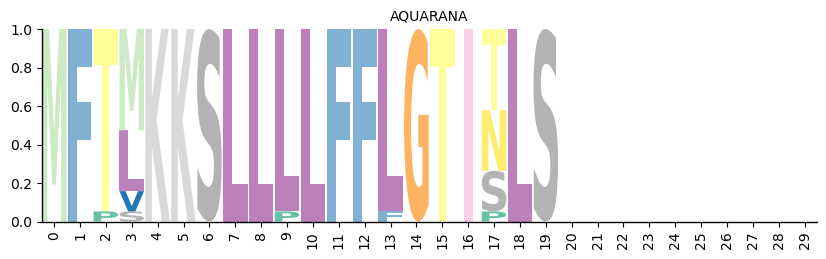

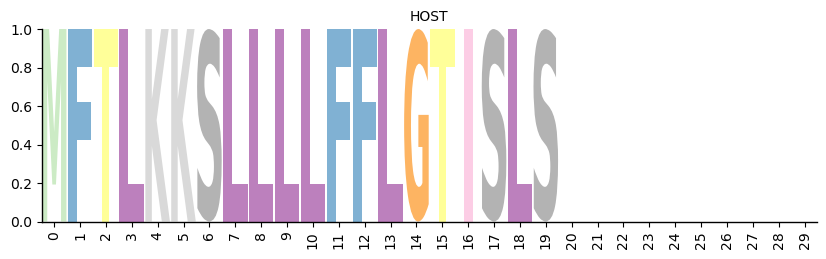

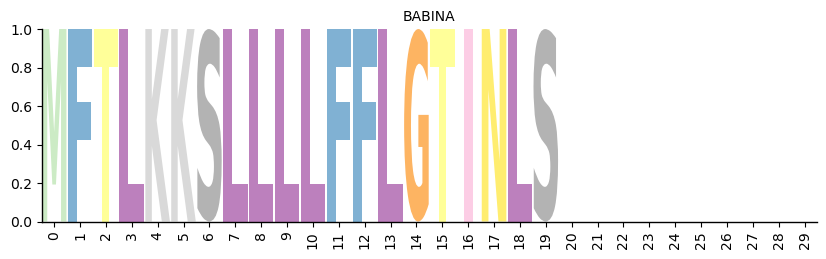

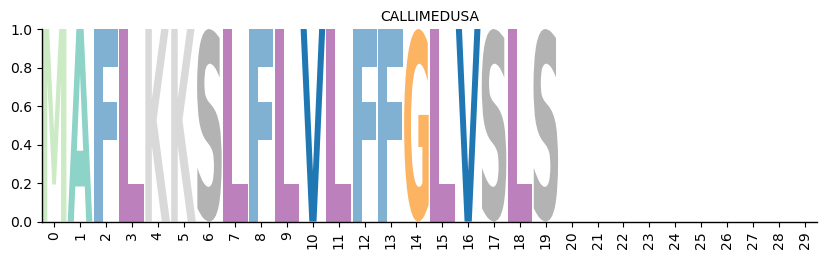

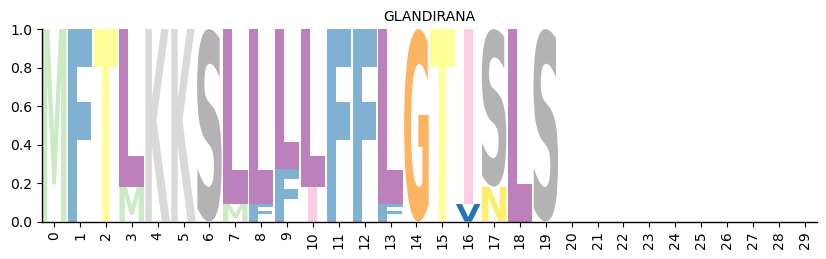

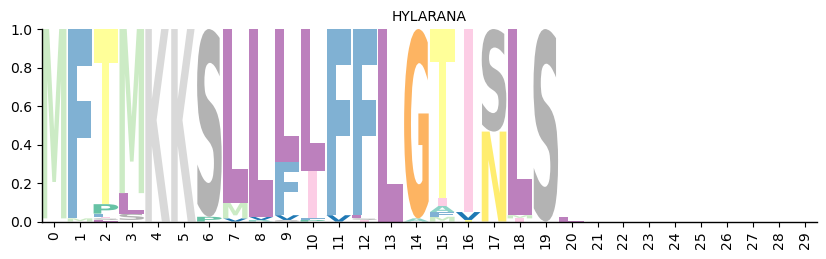

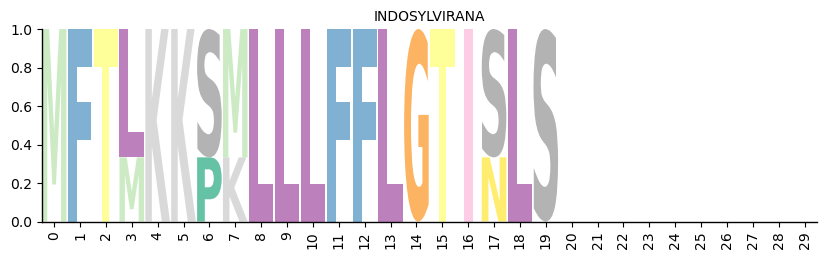

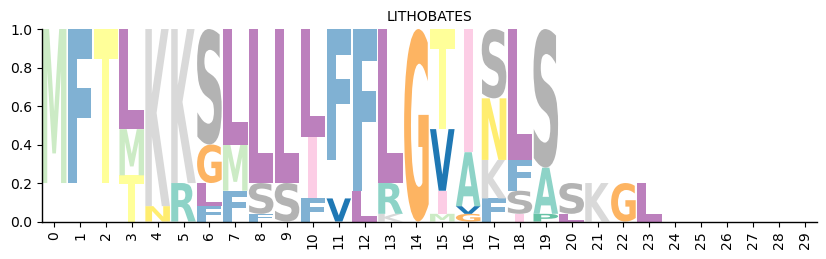

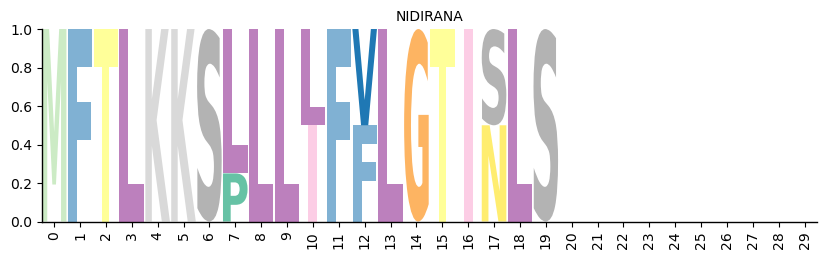

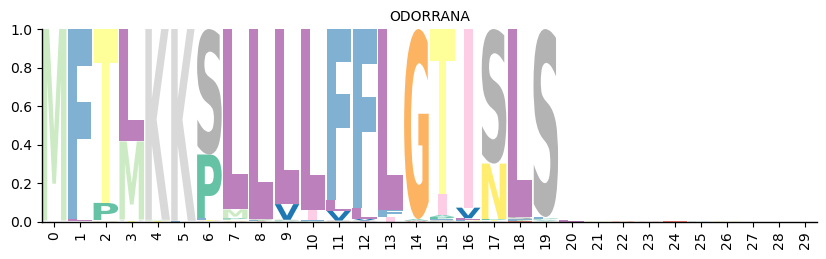

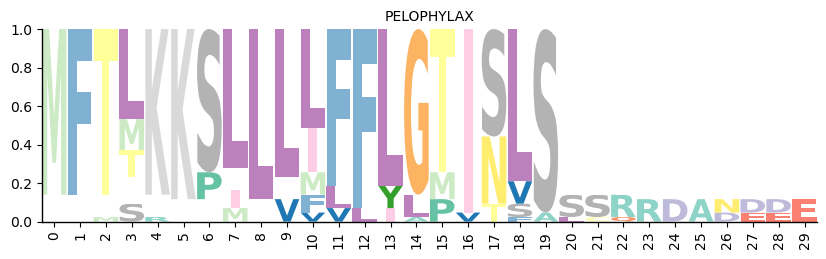

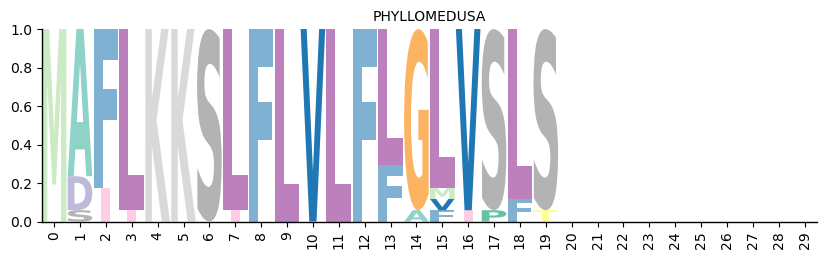

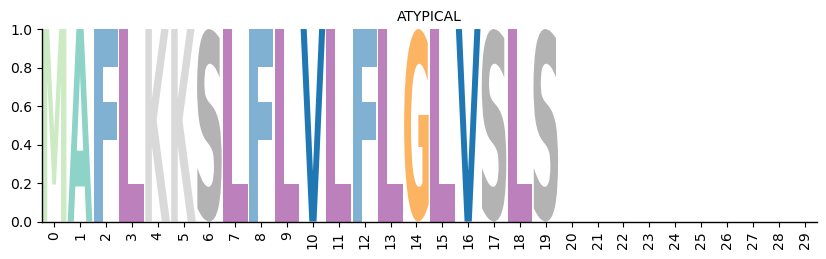

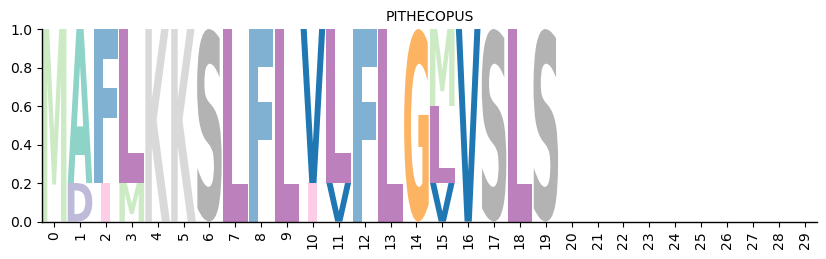

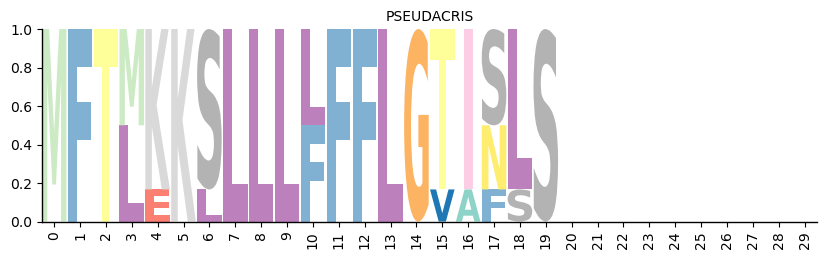

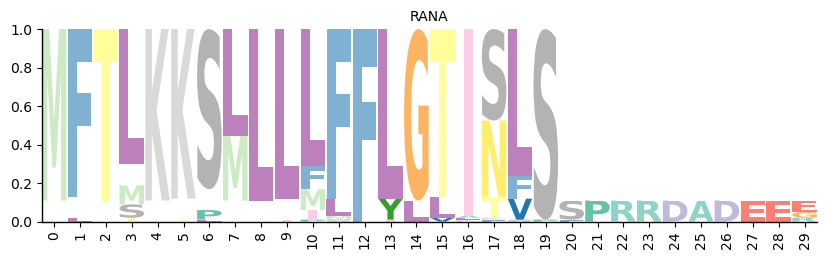

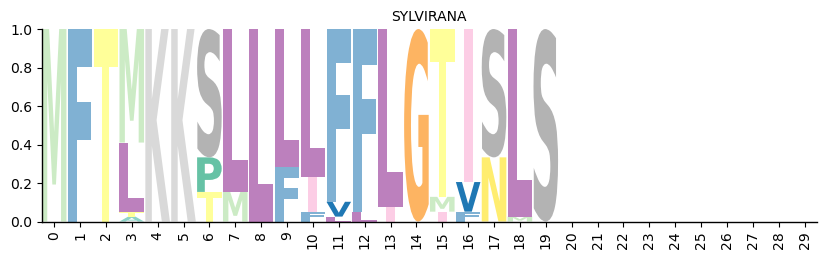

In [53]:
for peptide_family in df_csv_bio['Species Family'].unique():
    seqs_array = df_csv_bio[df_csv_bio['Species Family'] == peptide_family]['alignment'].apply(lambda x: list(x)).to_list()
    graficar_logo(seqs_array, peptide_family, 'especies')